
# Prediction with a pre-trained model 

In [1]:
# from tensorflow.keras import backend
from tensorflow.keras.models import load_model
from unet3 import *
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3"  # Only GPU 3 is visible to this code

# load json and create model 
json_file = open('model/model3.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model/pretrained_model.hdf5")

print("Loaded model from disk")

# training image dimensions
n1, n2, n3 = 128, 128, 128

/home/anyu/anaconda3/envs/faultSeg36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/anyu/anaconda3/envs/faultSeg36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/anyu/anaconda3/envs/faultSeg36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/anyu/anaconda3/envs/faultSeg36/lib

Loaded model from disk


In [14]:
# def getMasktest(os):
#     sc = np.zeros((n1,n2,n3),dtype=np.single) #all 0 
#     print(sc.shape,sc.mean())
#     sc = sc+1 #all 1
#     print(sc.shape,sc.mean())
#     sp = np.zeros((os),dtype=np.single) 
#     print(sp.shape,sp)
#     sig = os/4
#     sig = 0.5/(sig*sig)
#     print(sig)
#     for ks in range(os):
#         ds = ks-os+1
#         sp[ks] = np.exp(-ds*ds*sig)
#     print(sp)
#     for k1 in range(os):
#         for k2 in range(n2):
#             for k3 in range(n3):
#                 sc[k1][k2][k3]=sp[k1]
#                 sc[n1-k1-1][k2][k3]=sp[k1]
# #     print(sc)
#     for k1 in range(n1):
#         for k2 in range(os):
#             for k3 in range(n3):
#                 sc[k1][k2][k3]=sp[k2]
#                 sc[k1][n3-k2-1][k3]=sp[k2]
# #     print(sc)
#     for k1 in range(n1):
#         for k2 in range(n2):
#             for k3 in range(os):
#                 sc[k1][k2][k3]=sp[k3]
#                 sc[k1][k2][n3-k3-1]=sp[k3]
# #     print(sc)
#     return sc

# a = getMasktest(12)


# # convert a gassin distributed bourder mask cube (128*128*128) for overlap bounary 12, 
# #inside 128-24^3 all 1 while boundary 12 pixels are gaussion decrease to 0

(128, 128, 128) 0.0
(128, 128, 128) 1.0
(12,) [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.05555555555555555
[0.00120386 0.00386592 0.011109   0.0285655  0.06572853 0.13533528
 0.2493522  0.41111228 0.60653067 0.8007374  0.94595945 1.        ]


In [2]:
# set gaussian weights in the overlap bounaries
def getMask(os):
    sc = np.zeros((n1,n2,n3),dtype=np.single) #all 0 
    sc = sc+1 #all 1
    sp = np.zeros((os),dtype=np.single) 
    sig = os/4
    sig = 0.5/(sig*sig)
    for ks in range(os):
        ds = ks-os+1
        sp[ks] = np.exp(-ds*ds*sig)
    for k1 in range(os):
        for k2 in range(n2):
            for k3 in range(n3):
                sc[k1][k2][k3]=sp[k1]
                sc[n1-k1-1][k2][k3]=sp[k1]
    for k1 in range(n1):
        for k2 in range(os):
            for k3 in range(n3):
                sc[k1][k2][k3]=sp[k2]
                sc[k1][n3-k2-1][k3]=sp[k2]
    for k1 in range(n1):
        for k2 in range(n2):
            for k3 in range(os):
                sc[k1][k2][k3]=sp[k3]
                sc[k1][k2][n3-k3-1]=sp[k3]
    return sc

## ======================================================================


## prediction test on a training image 

In [ ]:
data_folder = "..<DATA FOLDER>.."

1/1 [==============================] - 4s 4s/step


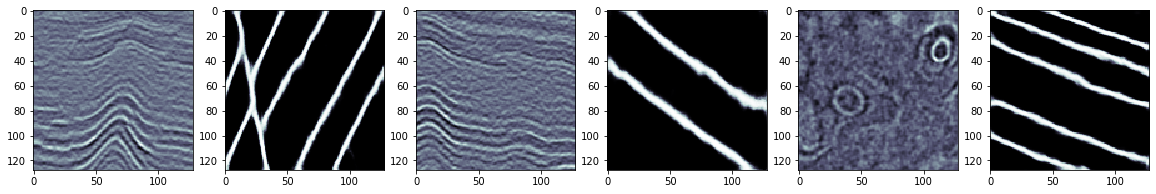

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

gx,m1,m2,m3 = np.fromfile("{}/faultSegData/train/seis/8.dat".format(data_folder),dtype=np.single),128,128,128
gx = gx-np.min(gx)
gx = gx/np.max(gx)
gx = gx*255
k = 50
x = np.reshape(gx,(1,n1,n2,n3,1))
Y = loaded_model.predict(x,verbose=1)
fig = plt.figure(figsize=(20,20))
#inline slice
k1 = 50
plt.subplot(1, 6, 1)
imgplot1 = plt.imshow(np.transpose(x[0,k,:,:,0]),cmap=plt.cm.bone,interpolation='nearest',aspect=1)
plt.subplot(1, 6, 2)
imgplot2 = plt.imshow(np.transpose(Y[0,k,:,:,0]),cmap=plt.cm.bone,interpolation='nearest',aspect=1)
#xline slice
k2 = 110
plt.subplot(1, 6, 3)
imgplot1 = plt.imshow(np.transpose(x[0,:,k2,:,0]),cmap=plt.cm.bone,interpolation='nearest',aspect=1)
plt.subplot(1, 6, 4)
imgplot2 = plt.imshow(np.transpose(Y[0,:,k2,:,0]),cmap=plt.cm.bone,interpolation='nearest',aspect=1)

#time slice
k3 = 60
plt.subplot(1, 6, 5)
imgplot1 = plt.imshow(np.transpose(x[0,:,:,k3,0]),cmap=plt.cm.bone,interpolation='nearest',aspect=1)
plt.subplot(1, 6, 6)
imgplot2 = plt.imshow(np.transpose(Y[0,:,:,k3,0]),cmap=plt.cm.bone,interpolation='nearest',aspect=1)

 
## ======================================================================

## prediction test on a field seismic image extracted from

## the Netherlands off-shore F3 block seismic data

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

#a 3d array of gx[m1][m2][m3], please make sure the dimensions are correct!!!
#we strongly suggest to gain the seismic image before input it to the faultSeg!!!
gx,m1,m2,m3 = np.fromfile("{}/faultSegData/prediction/f3d/gxl.dat".format(data_folder),dtype=np.single),512,384,128
os = 12 #overlap width
c1 = np.round((m1+os)/(n1-os)+0.5)
c2 = np.round((m2+os)/(n2-os)+0.5)
c3 = np.round((m3+os)/(n3-os)+0.5)
c1 = int(c1)
c2 = int(c2)
c3 = int(c3)
p1 = (n1-os)*c1+os
p2 = (n2-os)*c2+os
p3 = (n3-os)*c3+os
gx = np.reshape(gx,(m1,m2,m3))
gp = np.zeros((p1,p2,p3),dtype=np.single)
gy = np.zeros((p1,p2,p3),dtype=np.single)
mk = np.zeros((p1,p2,p3),dtype=np.single)
gs = np.zeros((1,n1,n2,n3,1),dtype=np.single)
gp[0:m1,0:m2,0:m3]=gx
sc = getMask(os)
for k1 in range(c1):
    for k2 in range(c2):
        for k3 in range(c3):
            b1 = k1*n1-k1*os
            e1 = b1+n1
            b2 = k2*n2-k2*os
            e2 = b2+n2
            b3 = k3*n3-k3*os
            e3 = b3+n3
            gs[0,:,:,:,0]=gp[b1:e1,b2:e2,b3:e3]
            gs = gs-np.min(gs)
            gs = gs/np.max(gs)
            gs = gs*255
            Y = loaded_model.predict(gs,verbose=1)
            Y = np.array(Y)
            gy[b1:e1,b2:e2,b3:e3]= gy[b1:e1,b2:e2,b3:e3]+Y[0,:,:,:,0]*sc
            mk[b1:e1,b2:e2,b3:e3]= mk[b1:e1,b2:e2,b3:e3]+sc
gy = gy/mk
gy = gy[0:m1,0:m2,0:m3]
gy.tofile("data/prediction/f3d/"+"fp.dat",format="%4")

1/1 [==============================] - 0s 111ms/step


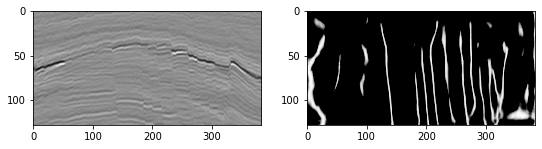

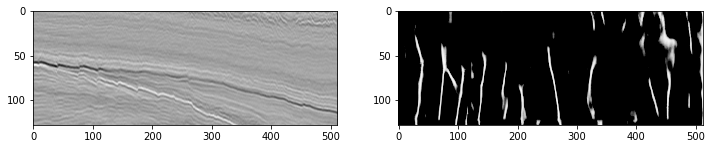

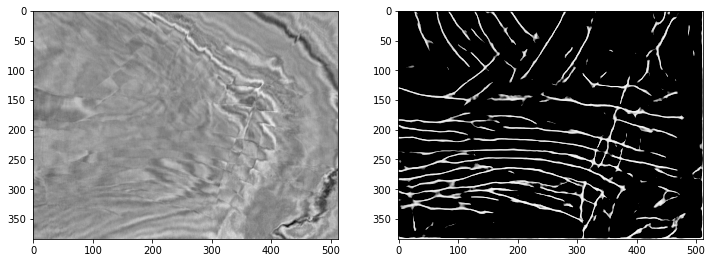

In [8]:
from matplotlib.colors import Normalize
from PIL import Image
gx,m1,m2,m3 = np.fromfile("{}/faultSegData/prediction/f3d/gxl.dat".format(data_folder),dtype=np.single),512,384,128
gy.tofile("data/prediction/f3d/"+"fp.dat",format="%4")
gx = np.reshape(gx,(m1,m2,m3))
gy = np.reshape(gy,(m1,m2,m3))

k1,k2,k3 = 29,29,99
gx1 = np.transpose(gx[k1,:,:])
gy1 = np.transpose(gy[k1,:,:])
gx2 = np.transpose(gx[:,k2,:])
gy2 = np.transpose(gy[:,k2,:])
gx3 = np.transpose(gx[:,:,k3])
gy3 = np.transpose(gy[:,:,k3])

#xline slice
fig = plt.figure(figsize=(9,9))
p1 = plt.subplot(1, 2, 1)
p1.imshow(gx1,aspect=1.5,cmap=plt.cm.gray)
p2 = plt.subplot(1,2,2)
p2.imshow(gy1,aspect=1.5,interpolation="bilinear",vmin=0.4,vmax=1.0,cmap=plt.cm.gray)

#inline slice
fig = plt.figure(figsize=(12,12))
p1 = plt.subplot(1, 2, 1)
p1.imshow(gx2,aspect=1.5,cmap=plt.cm.gray)
p2 = plt.subplot(1,2,2)
p2.imshow(gy2,aspect=1.5,interpolation="bilinear",vmin=0.4,vmax=1.0,cmap=plt.cm.gray)

#time slice
fig = plt.figure(figsize=(12,12))
p1 = plt.subplot(1, 2, 1)
p1.imshow(gx3,cmap=plt.cm.gray)
p2 = plt.subplot(1,2,2)
p2.imshow(gy3,interpolation="bilinear",vmin=0.4,vmax=1.0,cmap=plt.cm.gray)


prediction on thebe test

repeat use same direction as f3 il,xl,t

## use unnormalized data

In [3]:
seis = np.load("{}/thebeData/thebeorigin/seistest.npy").format(data_folder)
print(seis.shape)

gx = seis.astype(np.single)
print(gx.shape, gx.dtype)

m1,m2,m3 = 703,3174,1537
print(m1,m2,m3 )

(703, 3174, 1537)
(703, 3174, 1537) float32
703 3174 1537


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

#a 3d array of gx[m1][m2][m3], please make sure the dimensions are correct!!!
#we strongly suggest to gain the seismic image before input it to the faultSeg!!!
# gx,m1,m2,m3 = np.fromfile("/data/anyu/faultSegData/prediction/f3d/gxl.dat",dtype=np.single),512,384,128
os = 12 #overlap width
c1 = np.round((m1+os)/(n1-os)+0.5)
c2 = np.round((m2+os)/(n2-os)+0.5)
c3 = np.round((m3+os)/(n3-os)+0.5)
c1 = int(c1)
c2 = int(c2)
c3 = int(c3)
p1 = (n1-os)*c1+os
p2 = (n2-os)*c2+os
p3 = (n3-os)*c3+os
gx = np.reshape(gx,(m1,m2,m3))
gp = np.zeros((p1,p2,p3),dtype=np.single)
gy = np.zeros((p1,p2,p3),dtype=np.single)
mk = np.zeros((p1,p2,p3),dtype=np.single)
gs = np.zeros((1,n1,n2,n3,1),dtype=np.single)
gp[0:m1,0:m2,0:m3]=gx
sc = getMask(os)
for k1 in range(c1):
    for k2 in range(c2):
        for k3 in range(c3):
            b1 = k1*n1-k1*os
            e1 = b1+n1
            b2 = k2*n2-k2*os
            e2 = b2+n2
            b3 = k3*n3-k3*os
            e3 = b3+n3
            gs[0,:,:,:,0]=gp[b1:e1,b2:e2,b3:e3]
            gs = gs-np.min(gs)
            gs = gs/np.max(gs)
            gs = gs*255
            Y = loaded_model.predict(gs,verbose=1)
            Y = np.array(Y)
            gy[b1:e1,b2:e2,b3:e3]= gy[b1:e1,b2:e2,b3:e3]+Y[0,:,:,:,0]*sc
            mk[b1:e1,b2:e2,b3:e3]= mk[b1:e1,b2:e2,b3:e3]+sc
gy = gy/mk
gy = gy[0:m1,0:m2,0:m3]
# gy.tofile("data/prediction/thebetest/"+"fp.dat",format="%4")

/home/anyu/anaconda3/envs/faultSeg36/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


1/1 [==============================] - 0s 112ms/step


1/1 [==============================] - 0s 113ms/step


1/1 [==============================] - 0s 113ms/step


1/1 [==============================] - 0s 116ms/step


1/1 [==============================] - 0s 112ms/step


1/1 [==============================] - 0s 114ms/step


1/1 [==============================] - 0s 114ms/step


1/1 [==============================] - 0s 115ms/step


1/1 [==============================] - 0s 114ms/step


1/1 [==============================] - 0s 113ms/step


1/1 [==============================] - 0s 115ms/step


1/1 [==============================] - 0s 116ms/step


1/1 [==============================] - 0s 114ms/step


1/1 [==============================] - 0s 143ms/step


1/1 [==============================] - 0s 112ms/step


1/1 [==============================] - 0s 117ms/step


1/1 [==============================] - 0s 113ms/step


1/1 [==============================] - 0s 127ms/step


In [5]:
print(gy.sum())

423385540.0


In [6]:
print(gy.shape,gy.dtype, gy.min(), gy.max())

(703, 3174, 1537) float32 4.47716e-38 0.99999845


In [7]:
gt = np.load("{}/thebeData/thebeorigin/faulttest.npy").format(data_folder)
print(gt.shape)
print(gx.shape)
print(gy.shape)

(703, 3174, 1537)
(703, 3174, 1537)
(703, 3174, 1537)


In [23]:
# k1,k2,k3 = 100,1100,1000
# gx1 = np.transpose(gx[k1,:,:])
# gy1 = np.transpose(gy[k1,:,:])
# gt1 = np.transpose(gt[k1,:,:])

# gx2 = np.transpose(gx[:,k2,:])
# gy2 = np.transpose(gy[:,k2,:])
# gt2 = np.transpose(gt[:,k2,:])

# gx3 = np.transpose(gx[:,:,k3])
# gy3 = np.transpose(gy[:,:,k3])
# gt3 = np.transpose(gt[:,:,k3])

# #xline slice
# fig = plt.figure(figsize=(9,9))
# p1 = plt.subplot(1, 3, 1)
# p1.imshow(gx1,aspect=1.5,cmap=plt.cm.gray)
# p2 = plt.subplot(1,3,2)
# p2.imshow(gy1,aspect=1.5,interpolation="bilinear",vmin=0.4,vmax=1.0,cmap=plt.cm.gray)
# p3 = plt.subplot(1,3,3)
# p3.imshow(gt1,aspect=1.5,interpolation="bilinear",vmin=0.4,vmax=1.0,cmap=plt.cm.gray)


# #inline slice
# fig = plt.figure(figsize=(12,12))
# p1 = plt.subplot(1, 3, 1)
# p1.imshow(gx2,aspect=1.5,cmap=plt.cm.gray)
# p2 = plt.subplot(1,3,2)
# p2.imshow(gy2,aspect=1.5,interpolation="bilinear",vmin=0.4,vmax=1.0,cmap=plt.cm.gray)
# p3 = plt.subplot(1,3,3)
# p3.imshow(gt2,aspect=1.5,interpolation="bilinear",vmin=0.4,vmax=1.0,cmap=plt.cm.gray)

# #time slice
# fig = plt.figure(figsize=(12,12))
# p1 = plt.subplot(1, 3, 1)
# p1.imshow(gx3,cmap=plt.cm.gray)
# p2 = plt.subplot(1,3,2)
# p2.imshow(gy3,interpolation="bilinear",vmin=0.4,vmax=1.0,cmap=plt.cm.gray)
# p3 = plt.subplot(1,3,3)
# p3.imshow(gt3,aspect=1.5,interpolation="bilinear",vmin=0.4,vmax=1.0,cmap=plt.cm.gray)



In [22]:
# fig = plt.figure(figsize=(50,20))
# p1 = plt.subplot(3,1,1)
# p1.imshow(gx1,aspect=1.5,cmap=plt.cm.gray)
# p2 = plt.subplot(3,1,2)
# p2.imshow(gy1,aspect=1.5,interpolation="bilinear",vmin=0.4,vmax=1.0,cmap=plt.cm.gray)
# p3 = plt.subplot(3,1,3)
# p3.imshow(gt1,aspect=1.5,interpolation="bilinear",vmin=0.4,vmax=1.0,cmap=plt.cm.gray)


In [16]:
print(np.transpose(gy[100,:,800:1300]).shape)

(500, 3174)


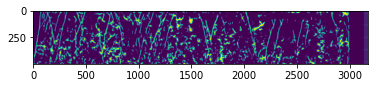

In [15]:
plt.imshow(np.transpose(gy[100,:,800:1300]))

In [21]:
import os
imageNo = 0
save_path = './faultSeg/thebe_pred/faultSeg3d'
for i in range(0,703,5): #len(seis)
    os.makedirs(save_path, exist_ok=True)
    np.save(os.path.join(save_path,"{}".format(imageNo)),np.transpose(gy[i,:,800:1300]))   
    imageNo = imageNo+1